# Week 11 - Introduction to Modeling, part 2

# 1. Lesson - No lesson this week

# 2. Weekly graph question

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

The book names one of Vonnegut's rules as "keep it simple" and another as "have the guts to cut."  Here is some data from the previous week's lesson.  If you had to cut one of the two plots below, which would it be?  Which seems more interesting or important?  Explain.  (Should "amount of training data used" or "number of estimators" be on the x-axis.)

In [4]:
np.random.seed(0)
num_points = 10000
feature_1a = np.random.random(size = num_points) * 3
feature_2a = np.random.random(size = num_points) * 3
feature_3a = np.random.random(size = num_points) * 3
train_target = (feature_1a - 2 * feature_2a) * feature_3a + np.random.normal(size = num_points)
feature_1b = np.random.random(size = num_points) * 3
feature_2b = np.random.random(size = num_points) * 3
feature_3b = np.random.random(size = num_points) * 3
test_target = (feature_1b - 2 * feature_2b) * feature_3b + np.random.normal(size = num_points)
train_df = pd.DataFrame({"f1": feature_1a, "f2": feature_2a, "f3": feature_3a})
test_df = pd.DataFrame({"f1": feature_1b, "f2": feature_2b, "f3": feature_3b})
rf = RandomForestRegressor()
rf.fit(train_df.values, train_target)

RandomForestRegressor()

In [5]:
rmse_lst = list()
rf = RandomForestRegressor()
for x in range(round(num_points / 20), num_points, round(num_points / 20)):
    rf.fit(train_df.values[0:x,:], train_target[0:x])
    rmse_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss function')

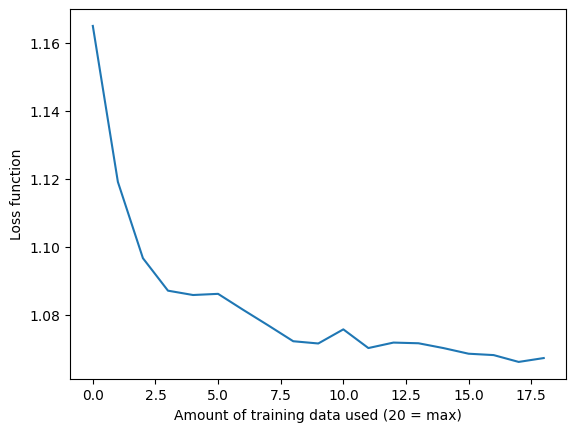

In [6]:
plt.plot(rmse_lst)
plt.xlabel("Amount of training data used (20 = max)")
plt.ylabel("Loss function")

In [8]:
num_trees_lst = list()
for n_estimators in range(1, 100, 3):
    rf = RandomForestRegressor(n_estimators = n_estimators)
    rf.fit(train_df.values, train_target)
    num_trees_lst.append(root_mean_squared_error(rf.predict(test_df.values), test_target))

Text(0, 0.5, 'Loss function')

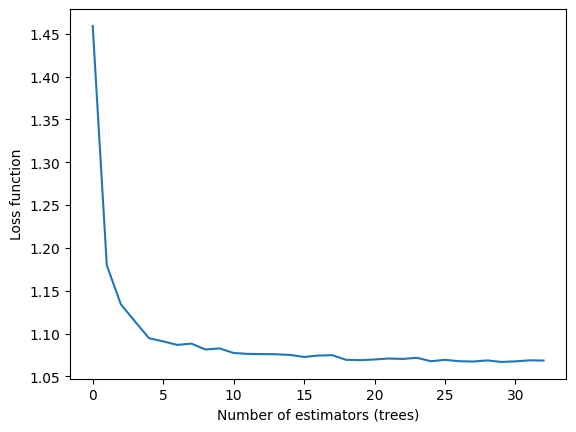

In [ ]:
plt.plot(num_trees_lst)
plt.xlabel("Number of estimators (trees)")
plt.ylabel("Loss function")

**My Answer:**

I would choose the second plot, where the x-axis shows the number of estimators (trees). This graph clearly shows that performance improves dramatically with just a small number of trees, and after around 10–15 estimators, the gains become minimal. This makes it a great example of Vonnegut’s rule to “keep it simple” or “have the guts to cut.” It suggests that I can use a much smaller number of trees without sacrificing much accuracy, which simplifies the model and speeds up training.

In contrast, the first plot (amount of training data) shows more gradual improvements. While there are diminishing returns, performance continues to improve with more data, making it harder to justify cutting there. That’s why I think the second plot is more interesting and practically useful.


# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:

* Implement a random forest model.
* Perform cross-validation.
* Tune hyperparameters.
* Evaluate a performance metric.

If you like, you can try other types of models, too (beyond linear regression and random forest) although you will have many opportunities to do that next semester.

In [9]:
# Load the dataset
df = pd.read_csv("df_housing_cleaned.csv")

pd.set_option('display.max_columns', None)

# Show shape of the dataset
print(f"Shape: {df.shape}")  # (rows, columns)

# Display column names and data types
print("\nColumn types:")
print(df.dtypes)

# Preview the first few rows
df.head()


Shape: (12461, 45)

Column types:
city                           object
streetAddress                  object
zipcode                         int64
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfAppliances                 int64
numOfParkingFeatures            int64
numOfPatioAndPor

,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,houseAge,pricePerSqFt
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,13,117.262591
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,12,166.855204
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,7,173.291610
3,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,12,143.027414
4,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,23,112.523452


In [10]:
# Drop unwanted columns
drop_cols = ["streetAddress", "latest_saledate", "pricePerSqFt", "latestPrice"]
df_model = df.drop(columns=drop_cols)

# One-hot encode object columns (e.g. city, homeType)
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Separate features and target
X = df_encoded
y = df["latestPrice"]



In [11]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (9968, 52)
Test shape: (2493, 52)


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize and train model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on test set: {rmse_baseline:.2f}")


RMSE on test set: 76478.58


In [13]:
from sklearn.model_selection import cross_val_score

# Use negative RMSE because sklearn expects higher = better
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

# Convert scores back to positive RMSE
cv_rmse = -cv_scores
print(f"Cross-validated RMSE scores: {cv_rmse}")
print(f"Mean CV RMSE: {cv_rmse.mean():.2f}")


Cross-validated RMSE scores: [105144.53922418  75822.5989706   67295.06328361 120737.60634271
  98963.64245998]
Mean CV RMSE: 93592.69


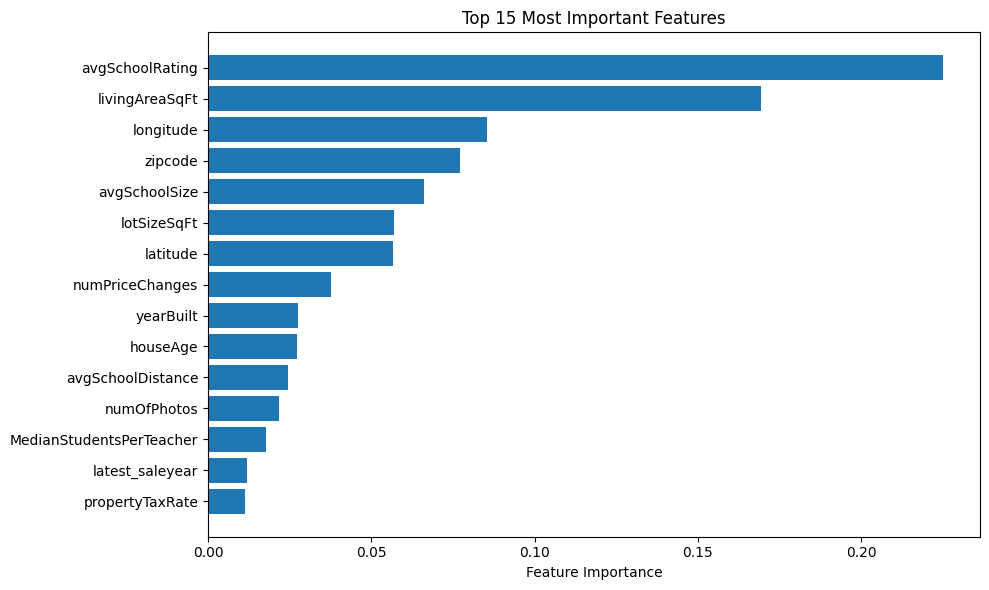

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Match them to column names
feature_names = X.columns
feat_imp_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Display top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df["Feature"][:15][::-1], feat_imp_df["Importance"][:15][::-1])
plt.xlabel("Feature Importance")
plt.title("Top 15 Most Important Features")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define param grid
param_grid = {
    "n_estimators": [5, 10, 20, 50, 100, 1000],
    "max_depth": [10, 20, 100, None],
    "max_features": ["sqrt", "log2"]
}

# Run GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=5,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)

# Convert results to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Add RMSE column (positive value)
results_df["mean_rmse"] = -results_df["mean_test_score"]

# Select and sort relevant columns
results_table = results_df[[
    "params", "mean_rmse", "rank_test_score", "mean_train_score"
]].sort_values(by="mean_rmse")

pd.set_option("display.max_colwidth", None)

# Display table
results_table.head(10)




Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ....max_depth=10, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END ....max_depth=10, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END ....max_depth=10, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END ....max_depth=10, max_features=sqrt, n_estimators=5; total time=   0.0s
[CV] END ....max_depth=10, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_estimators=20; total time=   0.1s
[CV] END ...max_depth=10, max_features=sqrt, n_

/Users/timbeer/Documents/Python Projects/.venv/lib/python3.13/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .max_depth=20, max_features=sqrt, n_estimators=1000; total time=  14.1s
[CV] END .max_depth=20, max_features=sqrt, n_estimators=1000; total time=  14.2s
[CV] END .max_depth=20, max_features=log2, n_estimators=1000; total time=  11.1s
[CV] END .max_depth=20, max_features=log2, n_estimators=1000; total time=  11.1s
[CV] END .max_depth=20, max_features=log2, n_estimators=1000; total time=  11.0s
[CV] END .max_depth=20, max_features=log2, n_estimators=1000; total time=  11.1s
[CV] END .max_depth=20, max_features=log2, n_estimators=1000; total time=  11.2s
[CV] END ...max_depth=100, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END ...max_depth=100, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END ...max_depth=100, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ..max_depth=100, max_features=sqrt, n_estimators=10; total time=   0.1s
[CV] END ...max_depth=100, m

,params,mean_rmse,rank_test_score,mean_train_score
41,"{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 1000}",79648.104592,1,-29358.680857
29,"{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 1000}",79648.104592,1,-29358.680857
17,"{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 1000}",79780.121175,3,-30701.991063
40,"{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}",80101.228062,4,-30011.308106
28,"{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 100}",80101.228062,4,-30011.308106
16,"{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 100}",80266.310328,6,-31426.368441
39,"{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}",80629.413406,7,-30928.275961
27,"{'max_depth': 100, 'max_features': 'sqrt', 'n_estimators': 50}",80629.413406,7,-30928.275961
15,"{'max_depth': 20, 'max_features': 'sqrt', 'n_estimators': 50}",81006.499645,9,-32317.038440
47,"{'max_depth': None, 'max_features': 'log2', 'n_estimators': 1000}",81713.221775,10,-30134.736235


In [17]:
# Final model with best-found parameters
final_model = RandomForestRegressor(
    n_estimators=1000,
    max_depth=None,
    max_features='sqrt',
    random_state=42
)

# Fit on training data
final_model.fit(X_train, y_train)

# Predict on test data
final_preds = final_model.predict(X_test)

# Calculate RMSE
final_rmse = np.sqrt(mean_squared_error(y_test, final_preds))
print(f"Final RMSE on test set: {final_rmse:.2f}")


Final RMSE on test set: 77584.01


In [18]:
from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, final_preds)
print(f"R² score on test set: {r2:.4f}")


R² score on test set: 0.7601


## Random Forest Regression on Housing Dataset

This week, I worked with a housing dataset to explore model training, evaluation, and optimization. I followed the given steps:

### 1. Model Implementation
I trained a baseline `RandomForestRegressor` using all numerical and one-hot encoded categorical features, with `latestPrice` as the target variable.

- **Baseline RMSE on test set:** ~$76,478

### 2. Cross-Validation
I evaluated model performance using 5-fold cross-validation with RMSE as the scoring metric.

- **Mean CV RMSE (baseline):** ~93,500

### 3. Hyperparameter Tuning
Using `GridSearchCV`, I tested combinations of `n_estimators`, `max_depth`, and `max_features`. The best-performing model had:

```python
{'n_estimators': 1000, 'max_depth': None, 'max_features': 'sqrt'}


# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter seven (p. 165-185) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

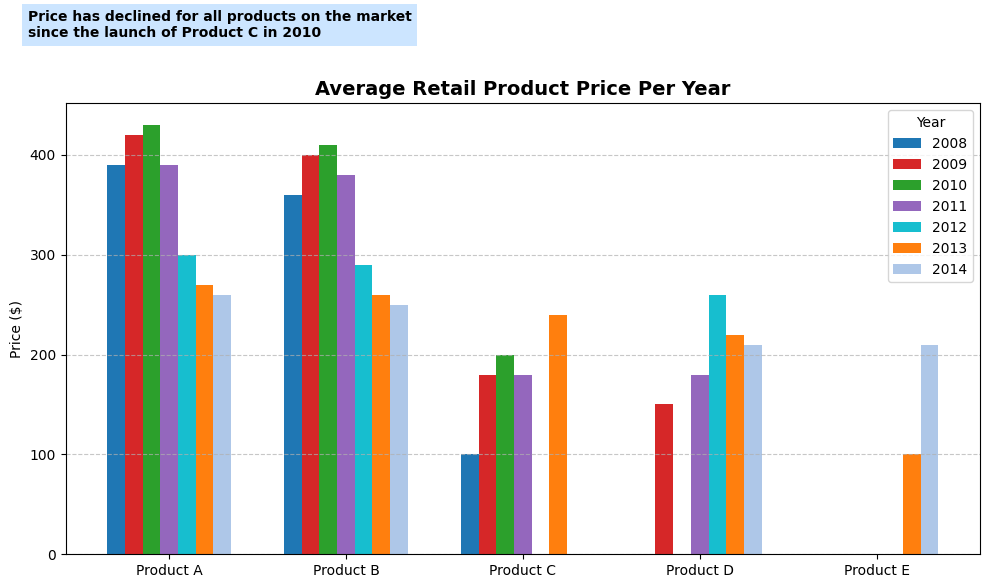

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Products and years
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
years = ['2008', '2009', '2010', '2011', '2012', '2013', '2014']
colors = ['#1f77b4', '#d62728', '#2ca02c', '#9467bd', '#17becf', '#ff7f0e', '#aec7e8']

# Approximated price data
data = [
    [390, 420, 430, 390, 300, 270, 260],
    [360, 400, 410, 380, 290, 260, 250],
    [100, 180, 200, 180, 0, 240, 0],
    [0, 150, 0, 180, 260, 220, 210],
    [0, 0, 0, 0, 0, 100, 210]
]

data = np.array(data)
bar_width = 0.1
x = np.arange(len(products))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(len(years)):
    ax.bar(x + i * bar_width, data[:, i], width=bar_width, label=years[i], color=colors[i])

ax.set_title('Average Retail Product Price Per Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Price ($)')
ax.set_xticks(x + bar_width * 3)
ax.set_xticklabels(products)
ax.legend(title='Year')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Callout annotation
plt.text(-0.5, 530, 'Price has declined for all products on the market\nsince the launch of Product C in 2010',
         fontsize=10, weight='bold', ha='left', va='center', bbox=dict(facecolor='#cce5ff', edgecolor='none'))

plt.tight_layout()
plt.show()
